# n-armed Bandit

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
from matplotlib import pyplot as plt

- slot machine with *n* arms
- each arm has normal distribution with variance = 1 

In [2]:
seed = 65432874
rand = np.random.RandomState(seed)

# bandit probabilities (randomly generated)
bandits = [0.5, 2.15, 1.02, 0.44, -3.6, 1.45, -0.62, 3.9, -1.16, 4.63]

def pull_bandit(bandit):
    return rand.normal(bandits[bandit], 1)   # choose from normal dist, with mean from bandit
                                             # and sigma = 1 (thus variance=1)

In [3]:
num_steps = 2000
n = len(bandits)

q = np.zeros(n)        # total reward
n_a = np.zeros(n)      # number of times (action) a chosen
q_t = np.zeros(n)      # average reward of action

In [4]:
eps = 0.1
def choose():
    '''eps-greedy choose'''
    _qi = list(range(n))
    if rand.random_sample() > eps:
        _qi = np.argwhere(q_t == np.amax(q_t)).flatten()
        if (len(_qi) == 1):
            return _qi[0]
    
    return _qi[rand.randint(0, len(_qi))]

In [5]:
r_total = np.zeros(num_steps)
r_avg = np.zeros(num_steps)
for s in range(1, num_steps):
    a = choose()
    # pulling the arm
    r = pull_bandit(a)
    # learn from the state, reward, action
    n_a[a] += 1
    q[a] += r 
    q_t[a] = q[a] / n_a[a]
    r_total[s] = r_total[s - 1] + r
    r_avg[s] = r_total[s] / s

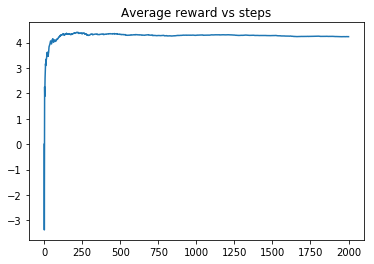

In [6]:
x = np.linspace(0, num_steps, num=num_steps)
plt.plot(x, r_avg)
plt.title('Average reward vs steps')
plt.show()

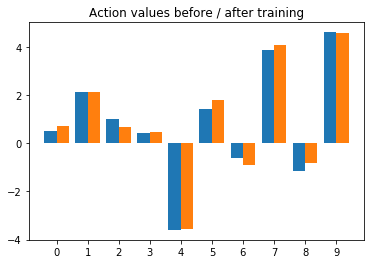

In [7]:
nx = np.arange(n)
plt.bar(nx, bandits, width=0.4)
plt.bar(nx + 0.4, q_t, width=0.4)
plt.xticks(nx + 0.2, nx)
plt.title('Action values before / after training')
plt.show()